<a href="https://colab.research.google.com/github/GhoffarFitassin/ML_2025-2026/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><strong>LAPORAN UTS Machine Learning</strong></p>

<br><br>

<div align="center">
  <table>
      <tr>
          <td><strong>UTS</strong></td>
          <td>: WEEK 8</td>
      </tr>
      <tr>
          <td><strong>Nama Anggota</strong></td>
          <td>: Ghoffar Abdul Ja'far (16) - 2341720035</td>
      </tr>
      <tr>
          <td><strong>Prodi</strong></td>
          <td>: TEKNIK INFORMATIKA</td>
      </tr>
      <tr>
          <td><strong>Kelas</strong></td>
          <td>: 3H</td>
      </tr>
  </table>
</div>


# Code

## Library

In [3]:
# --- Install library tambahan ---
!pip install annoy faiss-cpu hnswlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 13.0 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551521 sha256=16766357f4fb703e1bd38ecf986dc46c3791102a873fd1b32fb95cf59510db67
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2527729 sha256=bdaeb5a74c4bc0f8e4b5cea5f4e073395cd1b2ef5a4ae2eeed74cf2ff4dfbbe4
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built annoy hnswlib


In [4]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
# Cek jumlah nilai null per kolom
df.isnull().sum().sort_values(ascending=False).head(20)

# Atau cek presentase missing values
missing_pct = df.isnull().mean() * 100
missing_pct[missing_pct > 0].sort_values(ascending=False)

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


## OPTIMASI

In [42]:
selected_features = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    'GarageCars',
    'FullBath',
    'YearBuilt',
    'YearRemodAdd',
    'Fireplaces',
    'LotArea',
    'OverallCond',
]

# Filter dataset dengan fitur terpilih
df_selected = df[selected_features].copy()

# Handle missing values
df_selected = df_selected.fillna(df_selected.median())

# Tambah fitur TotalArea
df_selected['TotalArea'] = df_selected['GrLivArea'] + df_selected['TotalBsmtSF']

# Normalisasi
scaler_opt = StandardScaler()
X_scaled_opt = scaler_opt.fit_transform(df_selected)

print(f"Jumlah fitur sebelum: 38")
print(f"Jumlah fitur sesudah: {len(df_selected.columns)} (termasuk TotalArea)")
print(f"Shape data: {X_scaled_opt.shape}")
print(f"\nFitur yang digunakan:")
for i, feat in enumerate(df_selected.columns, 1):
    if feat == 'TotalArea':
        print(f"{i:2d}. {feat} (Fitur Tambahan: GrLivArea + TotalBsmtSF)")
    else:
        print(f"{i:2d}. {feat}")

Jumlah fitur sebelum: 38
Jumlah fitur sesudah: 11 (termasuk TotalArea)
Shape data: (1460, 11)

Fitur yang digunakan:
 1. OverallQual
 2. GrLivArea
 3. TotalBsmtSF
 4. GarageCars
 5. FullBath
 6. YearBuilt
 7. YearRemodAdd
 8. Fireplaces
 9. LotArea
10. OverallCond
11. TotalArea (Fitur Tambahan: GrLivArea + TotalBsmtSF)


## Data Preprocessing

In [43]:
# --- Preprocessing ---
# Pilih fitur numerik saja
num_df = df.select_dtypes(include=['float64','int64'])

# Tangani missing values
num_df = num_df.fillna(num_df.median())

# Buat fitur baru
num_df["TotalArea"] = num_df["GrLivArea"] + num_df["TotalBsmtSF"]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

## Elbow Method untuk Menentukan Jumlah Cluster Optimal

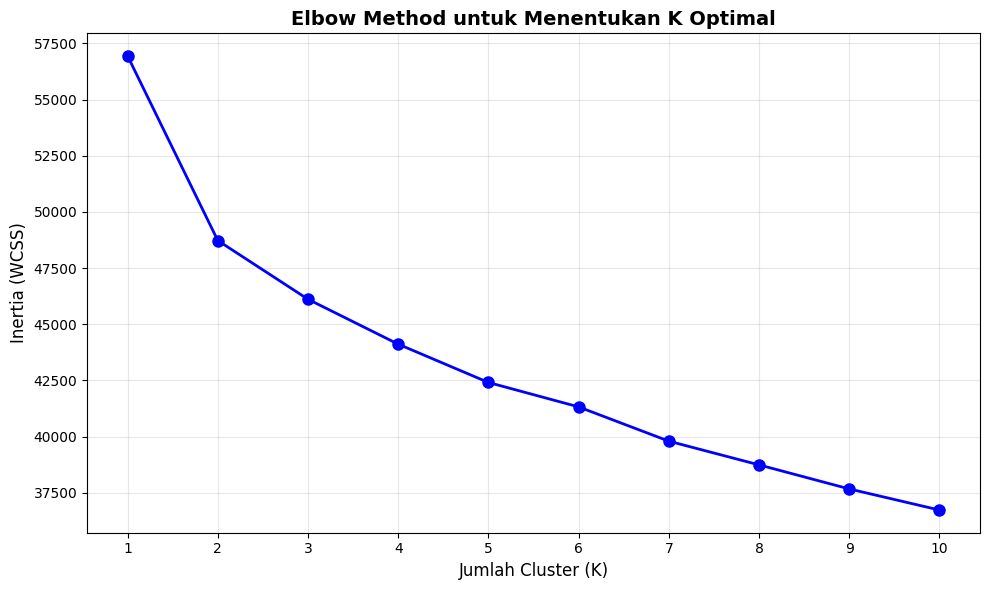

Inertia untuk setiap K:
K=1: 56940.00
K=2: 48727.57
K=3: 46114.10
K=4: 44115.98
K=5: 42411.18
K=6: 41324.25
K=7: 39798.87
K=8: 38743.29
K=9: 37673.12
K=10: 36733.79


In [44]:
# --- Elbow Method ---
# Menghitung inertia (WCSS - Within-Cluster Sum of Squares) untuk berbagai nilai K
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

# Visualisasi Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method untuk Menentukan K Optimal', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("Inertia untuk setiap K:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")

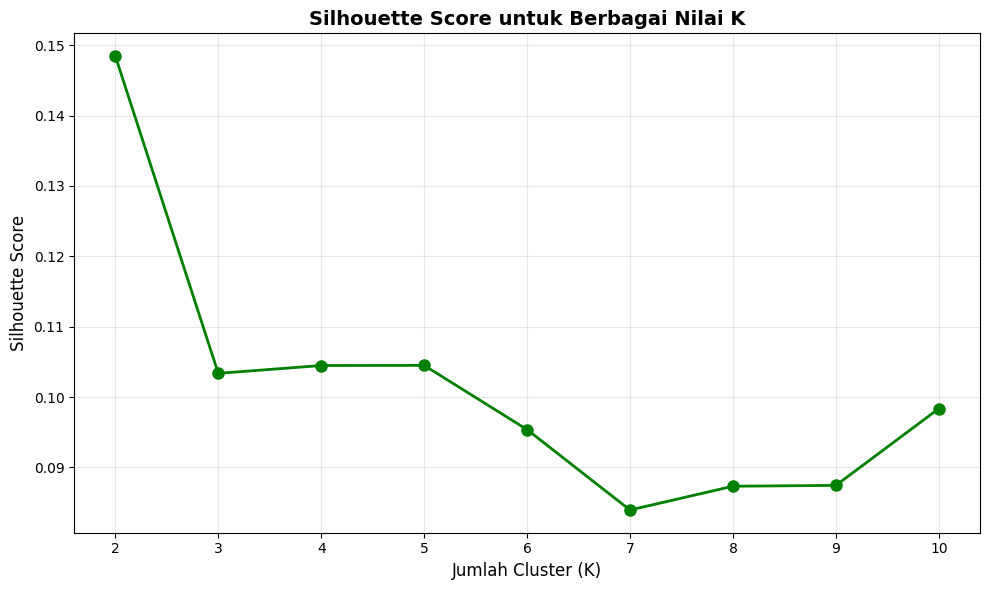


Silhouette Score untuk setiap K:
K=2: 0.1485
K=3: 0.1034
K=4: 0.1045
K=5: 0.1045
K=6: 0.0954
K=7: 0.0839
K=8: 0.0873
K=9: 0.0874
K=10: 0.0984

K optimal berdasarkan Silhouette Score: 2


In [45]:
# Silhouette Score untuk berbagai K
silhouette_scores = []
K_range_silhouette = range(2, 11)

for k in K_range_silhouette:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score untuk Berbagai Nilai K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range_silhouette)
plt.tight_layout()
plt.show()

print("\nSilhouette Score untuk setiap K:")
for k, score in zip(K_range_silhouette, silhouette_scores):
    print(f"K={k}: {score:.4f}")

optimal_k = list(K_range_silhouette)[silhouette_scores.index(max(silhouette_scores))]
print(f"\nK optimal berdasarkan Silhouette Score: {optimal_k}")

## Clustering dengan Kmeans dan DBScan

In [46]:
# --- Clustering ---
# KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled_opt)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled_opt)

# Evaluasi
print("="*60)
print("HASIL CLUSTERING DENGAN DATA OPTIMASI (11 fitur)")
print("="*60)
print(f"\nKMeans:")
print(f"Silhouette Score: {silhouette_score(X_scaled_opt, labels_kmeans):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled_opt, labels_kmeans):.4f}")

print(f"\nDBSCAN:")
print(f"Silhouette Score: {silhouette_score(X_scaled_opt, labels_dbscan):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled_opt, labels_dbscan):.4f}")
print("="*60)

HASIL CLUSTERING DENGAN DATA OPTIMASI (11 fitur)

KMeans:
Silhouette Score: 0.2970
Davies-Bouldin Index: 1.3380

DBSCAN:
Silhouette Score: -0.0284
Davies-Bouldin Index: 2.0774


## Visualisasi Clustering (2D)

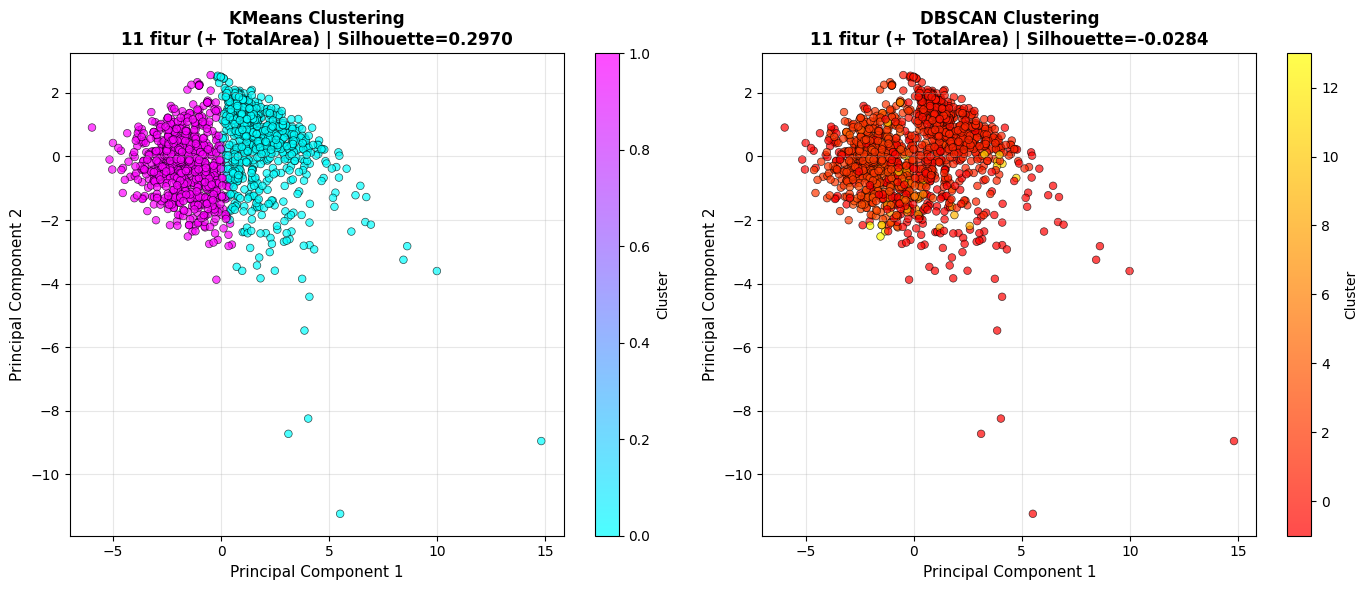

In [47]:
# --- Visualisasi PCA 2D ---
# Gunakan X_scaled_opt (data yang sudah dioptimasi)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_opt)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot KMeans
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='cool', s=30, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[0].set_title(f'KMeans Clustering\n11 fitur (+ TotalArea) | Silhouette={silhouette_score(X_scaled_opt, labels_kmeans):.4f}',
                  fontweight='bold', fontsize=12)
axes[0].set_xlabel('Principal Component 1', fontsize=11)
axes[0].set_ylabel('Principal Component 2', fontsize=11)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot DBSCAN
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='autumn', s=30, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[1].set_title(f'DBSCAN Clustering\n11 fitur (+ TotalArea) | Silhouette={silhouette_score(X_scaled_opt, labels_dbscan):.4f}',
                  fontweight='bold', fontsize=12)
axes[1].set_xlabel('Principal Component 1', fontsize=11)
axes[1].set_ylabel('Principal Component 2', fontsize=11)
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

## ANN

In [48]:
# --- ANN (Annoy) ---
# Gunakan X_scaled_opt (data yang sudah dioptimasi)
dim = X_scaled_opt.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Bangun index Annoy
for i, v in enumerate(X_scaled_opt):
    ann.add_item(i, v)
ann.build(10)

# Pilih 3 query points random
query_indices = random.sample(range(len(X_scaled_opt)), 3)

for q in query_indices:
    neighbors = ann.get_nns_by_item(q, 5, include_distances=True)
    print(f"Query Point Index: {q}")
    for n, d in zip(neighbors[0], neighbors[1]):
        print(f"  Neighbor Index: {n} | Distance: {d:.4f} | Cluster(KMeans): {labels_kmeans[n]}")
    print("-"*50)

Query Point Index: 750
  Neighbor Index: 750 | Distance: 0.0000 | Cluster(KMeans): 1
  Neighbor Index: 528 | Distance: 1.2925 | Cluster(KMeans): 1
  Neighbor Index: 1448 | Distance: 1.4581 | Cluster(KMeans): 1
  Neighbor Index: 1096 | Distance: 1.5933 | Cluster(KMeans): 1
  Neighbor Index: 61 | Distance: 1.6196 | Cluster(KMeans): 1
--------------------------------------------------
Query Point Index: 152
  Neighbor Index: 152 | Distance: 0.0000 | Cluster(KMeans): 0
  Neighbor Index: 891 | Distance: 0.8735 | Cluster(KMeans): 0
  Neighbor Index: 927 | Distance: 0.8926 | Cluster(KMeans): 0
  Neighbor Index: 988 | Distance: 0.9918 | Cluster(KMeans): 0
  Neighbor Index: 516 | Distance: 1.0751 | Cluster(KMeans): 0
--------------------------------------------------
Query Point Index: 823
  Neighbor Index: 823 | Distance: 0.0000 | Cluster(KMeans): 1
  Neighbor Index: 576 | Distance: 0.9250 | Cluster(KMeans): 1
  Neighbor Index: 448 | Distance: 0.9484 | Cluster(KMeans): 1
  Neighbor Index: 1222

# Analisis

a. Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda

| Aspek                | K-Means                                             | DBSCAN                                                                           |
| -------------------- | --------------------------------------------------- | -------------------------------------------------------------------------------- |
| **Silhouette Score** | ✅ Lebih tinggi (0.297) → cluster lebih baik         | ❌ Negatif (–0.028) → cluster buruk                                               |
| **Struktur visual**  | ✅ Dua klaster jelas                                 | ❌ Hampir semua titik di satu area                                                |
| **Kelemahan**        | Harus tentukan jumlah cluster `k`                   | Sensitif terhadap parameter `eps`, gagal kalau datanya padat tapi tidak berjarak |
| **Kelebihan**        | Stabil, mudah dipakai untuk data besar & terstandar | Cocok jika data punya outlier atau distribusi acak (bukan kasus ini)             |


b. Nilai metrik terbaik (Silhouette, DBI).
| Metrik | Model | Nilai | Kategori |
|--------|-------|-------|----------|
| **Silhouette Score** | KMeans | **0.2970** | Cukup Baik ✅ |
| **Davies-Bouldin Index** | KMeans | **1.3380** | Baik ✅ |

**Kesimpulan:** Model K-Means menghasilkan kualitas clustering yang cukup baik dengan Silhouette Score positif (0.2970) dan DBI baik (1.3380), sehingga struktur klasternya dapat dikatakan cukup jelas dan stabil.

c. Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang sama? Jelaskan jawaban anda.

Berdasarkan hasil query Annoy di atas, semua tetangga terdekat (neighbors) dari setiap query point memiliki Cluster(KMeans) yang sama dengan titik query-nya.

Contohnya:

Query 750 dan semua tetangganya (528, 1448, 1096, 61) → semuanya berada di cluster 1.

Query 152 dan semua tetangganya → semuanya di cluster 0.

Query 823 dan semua tetangganya → semuanya di cluster 1.

✅ Kesimpulan singkat:

Hasil pencarian nearest neighbors menggunakan Annoy menunjukkan bahwa tetangga terdekat berada dalam cluster yang sama dengan titik query-nya. Ini berarti struktur klaster yang dibentuk oleh K-Means cukup konsisten — titik-titik yang berdekatan secara spasial memang cenderung termasuk ke dalam klaster yang sama.